In [19]:
import math
import matplotlib
matplotlib.rcParams["figure.dpi"] = 1200

In [20]:
abs_path = "C:\\Dev\\Smart Car Project\\Dataset-prep\\self-made\\"

import pandas as pd

# df = pd.read_csv(abs_path + "output.csv")
df = pd.read_csv(abs_path + "output-aug.csv")
df

,filename,angle
0,2021_01_28_13_00_57_825300_picture_000001802.jpg,0.00000
1,2021_01_28_13_00_57_852987_picture_000001803.jpg,0.00000
2,2021_01_28_13_00_57_873467_picture_000001804.jpg,0.00000
3,2021_01_28_13_00_57_899802_picture_000001805.jpg,0.00000
4,2021_01_28_13_00_57_925743_picture_000001806.jpg,0.00000
...,...,...
60836,m-2021_01_28_13_14_43_789722_picture_000033038...,-0.06667
60837,m-2021_01_28_13_14_43_812140_picture_000033039...,-0.05000
60838,m-2021_01_28_13_14_43_837990_picture_000033040...,-0.05000
60839,m-2021_01_28_13_14_43_862758_picture_000033041...,-0.03333


In [21]:
new_angles = (((df['angle'] / 2) + 0.5) * 120) - 60
new_angles

0        0.0000
1        0.0000
2        0.0000
3        0.0000
4        0.0000
          ...  
60836   -4.0002
60837   -3.0000
60838   -3.0000
60839   -1.9998
60840   -1.0002
Name: angle, Length: 60841, dtype: float64

In [22]:
new_angles_low = new_angles[new_angles < 0].apply(math.floor) // 10
new_angles_high = (new_angles[new_angles > 0].apply(math.ceil) + 9) // 10
new_angles_mid = new_angles[new_angles == 0] // 10

new_angles = new_angles_low.append(new_angles_mid).append(new_angles_high) * 10

In [23]:
#norm_uni = df['angle'].unique()
norm_uni = new_angles.unique()
norm_uni.sort()
norm_uni

array([-60., -50., -40., -30., -20., -10.,   0.,  10.,  20.,  30.,  40.,
        50.,  60.])

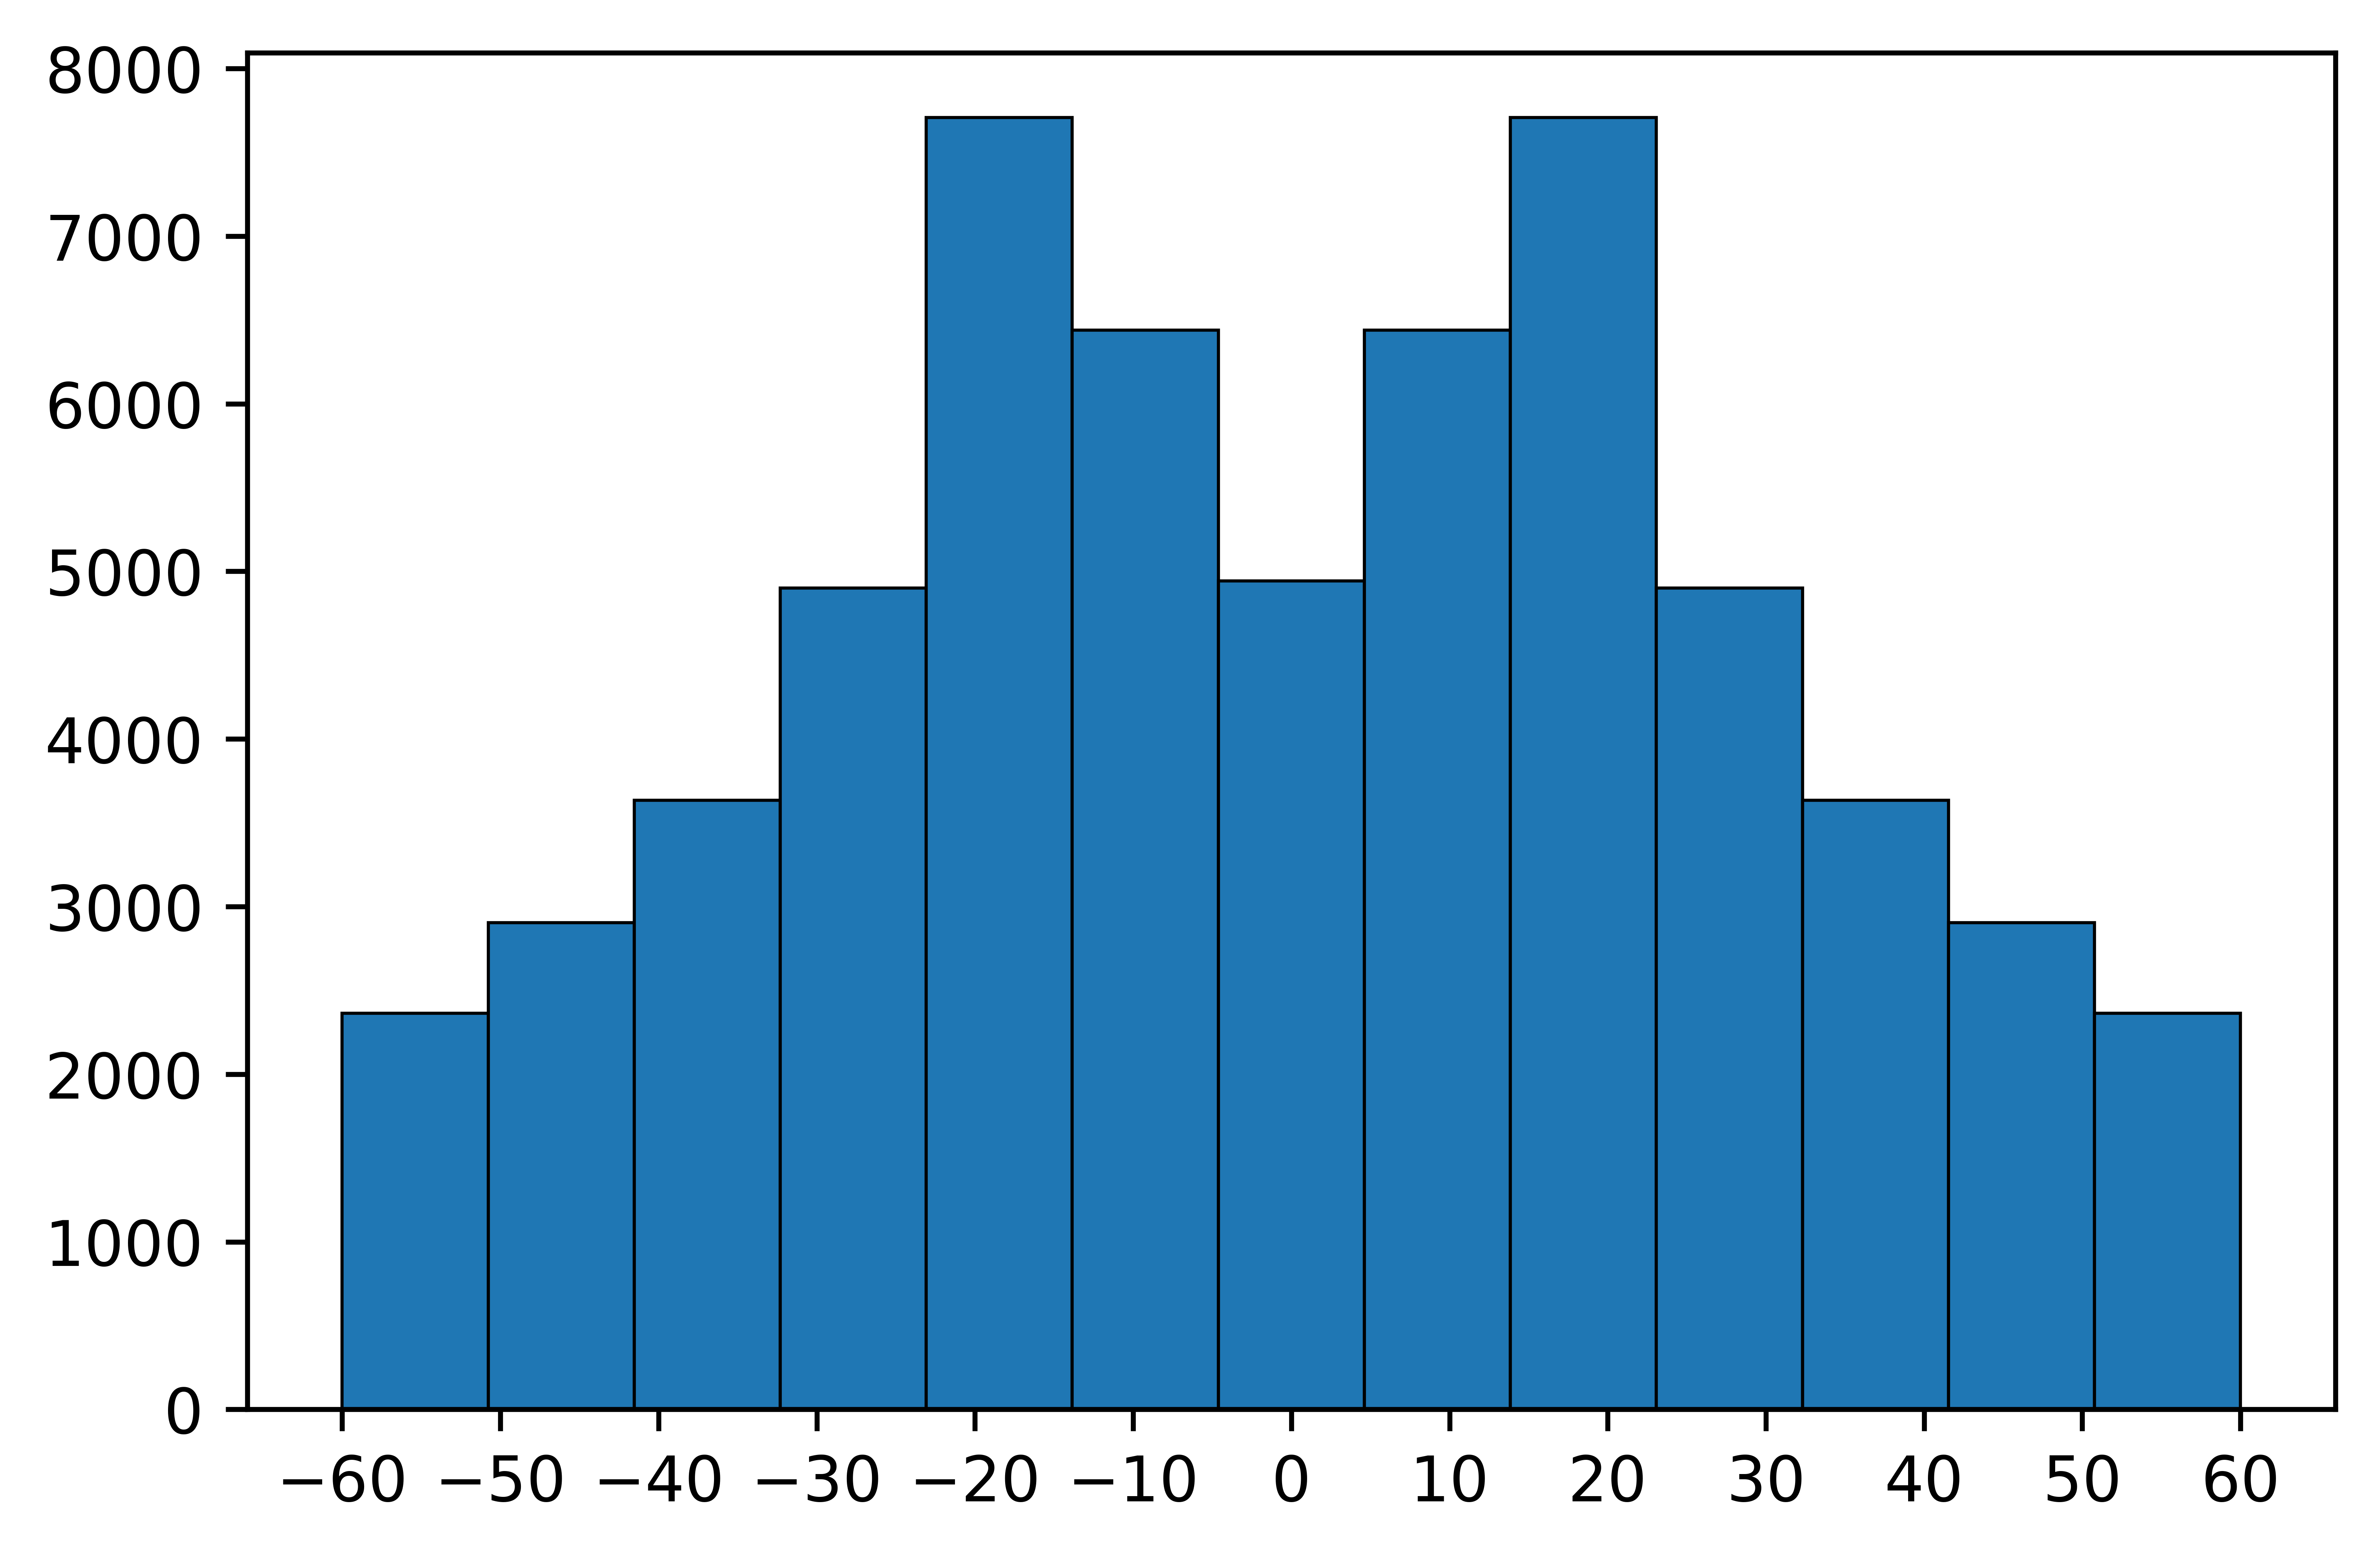

In [24]:
import matplotlib.pyplot as plt

#df_alt = (((df['angle'] / 2) + 0.5) * 120) + 30
#df_alt.hist(grid=False ,bins=df_alt.nunique())
new_angles.hist(grid=False ,bins=new_angles.nunique(), edgecolor='black', linewidth=0.5)
plt.xticks([-60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60])
plt.savefig("figure.png")
plt.show()